# What is this Project?

This is my approach on the "Synthetic Financial Datasets For Fraud Detection" machine learning problem. </br>

The objective here is to try and predict if a certain transaction was legitimate or fraudulent (more on that on the next section). </br>

This project consists in a jupyter notebook with complete EDA and feature engineering explanation.

Kaggle original link: https://www.kaggle.com/datasets/ealaxi/paysim1

These are the contents of this project:

* Exploratory Data Analysis
* Feature Engineering
* Classification Modeling using PyCaret:
    * Model Comparison
    * Model Selection
    * Model Tunning
    * Metrics
    * Prediction


Author: Augusto Gontijo </br>
LinkedIn: https://www.linkedin.com/in/augusto-gontijo/?locale=en_US </br>
GitHub: https://github.com/augusto-gontijo

# Context

There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

More on: https://www.kaggle.com/datasets/ealaxi/paysim1

# Dependencies

This project was developed using:

* Python Version: 3.8.10
* Numpy version: 1.19.5
* Pandas version: 1.4.1
* SKLearn version: 0.23.2
* pycaret version: 2.3.9
* Seaborn version: 0.11.2
* matplotlib version: 3.5.1

(you might have trouble if trying to use different versions)

# Imports   

## Libraries

In [1]:
# Data manipulation libs
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np

# Machine Learining classification libs
from sklearn.model_selection import train_test_split
from pycaret.classification import *

# Data visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
sns.set_style('whitegrid')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data

Importing the CSV file.

**Remember to alter the file path to the folder path on your computer**

In [2]:
raw = pd.read_csv("C:/... YOUR COMPUTER PATH .../PS_20174392719_1491204439457_log.csv")

# Exploratory Data Analysis (EDA)

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

More on: https://en.wikipedia.org/wiki/Exploratory_data_analysis

## Understanding the data

In this section we'll explore the raw data in order to understand it before modelling.

More on the official data here: https://www.kaggle.com/datasets/ealaxi/paysim1

### Data Overview

In [3]:
print("The 'raw' dataset contains {} rows and {} columns.".format(raw.shape[0], raw.shape[1]))

The 'raw' dataset contains 6362620 rows and 11 columns.


In [4]:
# Checking out the first 15 rows of the dataset

raw.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


### Data Dictionary

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Statistical Summary

In [5]:
raw.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


### Missing Data

In [6]:
# Checking for NA (not available) data.

raw.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Analyzing the Data

### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. </br>
Each cell in the table shows the correlation between two variables.

<AxesSubplot:>

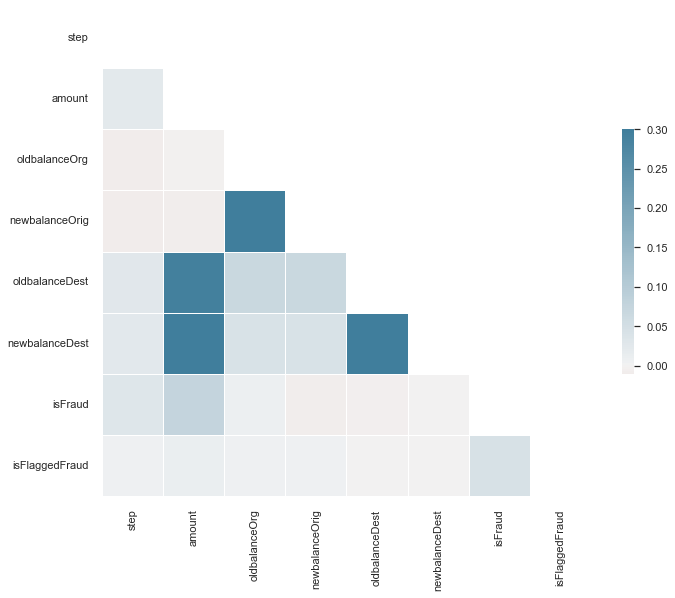

In [7]:
corr = raw.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In the matrix above, the correlation value can vary between -1 (negative correlation), 0 (no correlation) and 1 (positive correlation).

Some observations:

* We can observe some weak positive correlation between the 'amount' and the destination balances;
* Also, there are a mild correlation between the old and new balances of the new origin and destination accounts;

### Step Analysis

<AxesSubplot:xlabel='step', ylabel='Count'>

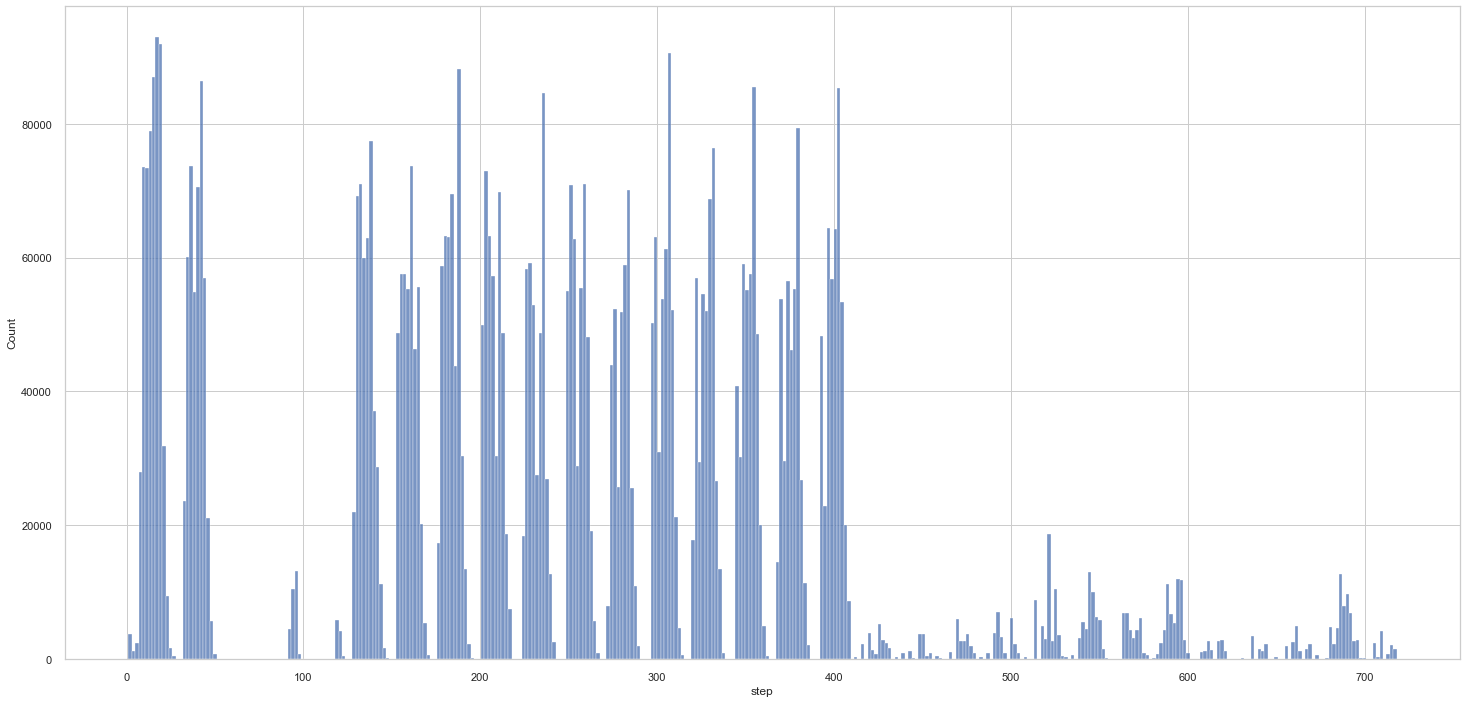

In [8]:
data = raw.filter(items = ["isFraud", "step"])
data = data.query('isFraud == 0')

dims = (25, 12)
fig, ax = plt.subplots(figsize = dims)

sns.histplot(data = data, 
             x = "step",              
             ax = ax)

As we can see on the histplot above, the great majority of the legitimate transactions occur between the 'step' 0 and 400

<AxesSubplot:xlabel='step', ylabel='Count'>

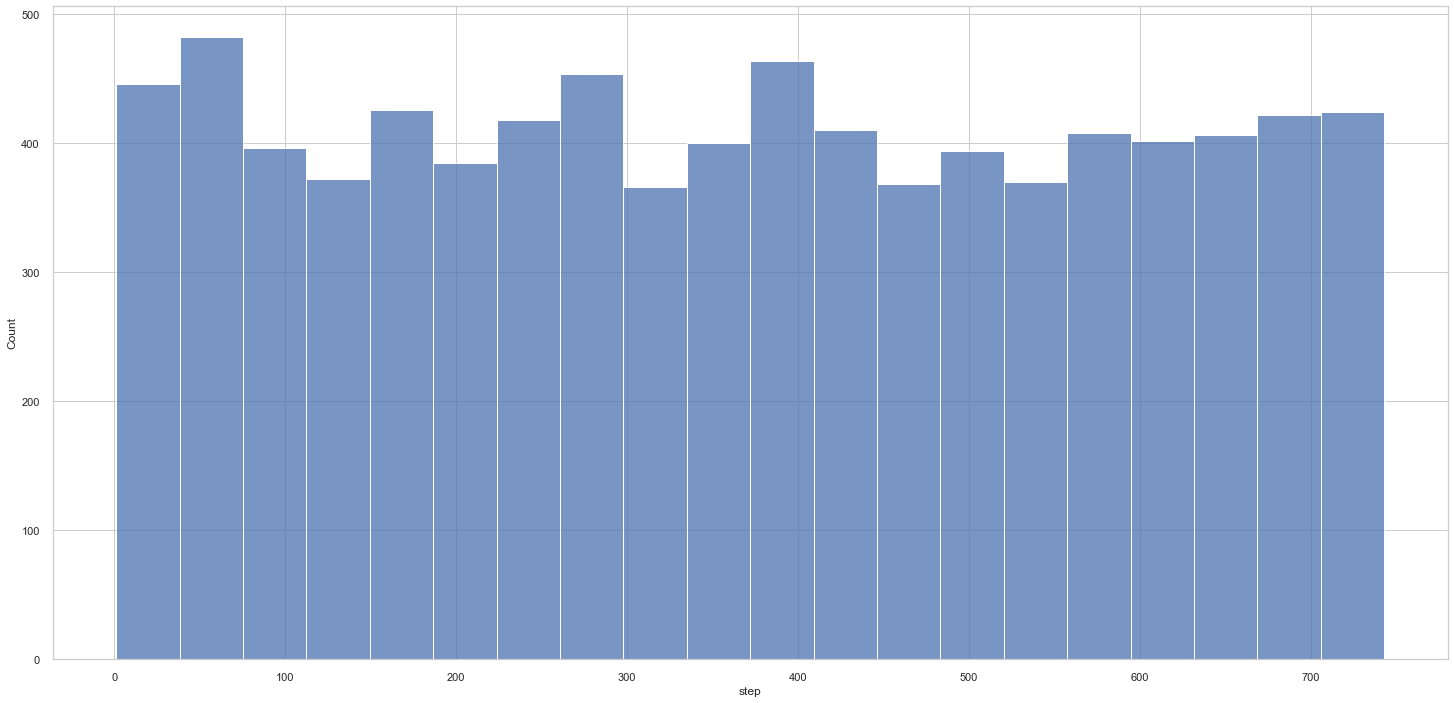

In [9]:
data = raw.filter(items = ["isFraud", "step"])
data = data.query('isFraud == 1')

dims = (25, 12)
fig, ax = plt.subplots(figsize = dims)

sns.histplot(data = data, 
             x = "step",              
             ax = ax)

On the other hand, as we can see on the histplot above, on the fraudulent transactions the occurrences are evenly distributed throughout the 'steps'.

### Type Analysis

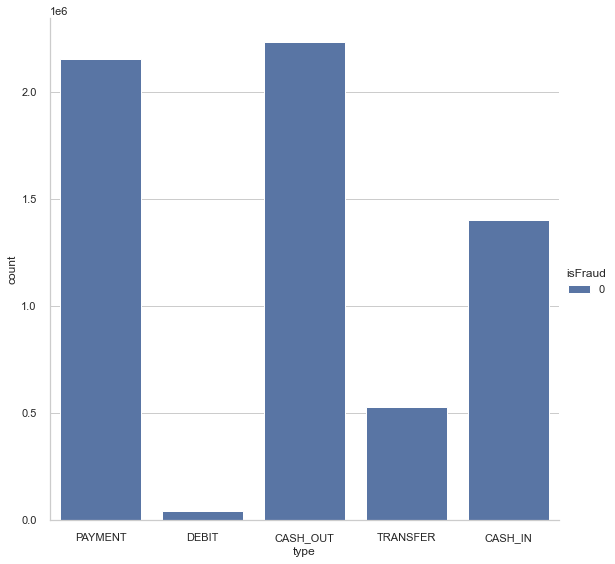

In [10]:
data = raw.filter(items = ["isFraud", "type"])
data = data.query('isFraud == 0')

sns.catplot(x = 'type', 
            hue = "isFraud", 
            kind = "count",            
            data = data, 
            height = 8, 
            aspect = 1            
            )

On the bar plot above, we can observe that the majority of the legitimate transactions are 'types' PAYMENT, CASH_OUT or CASH_IN

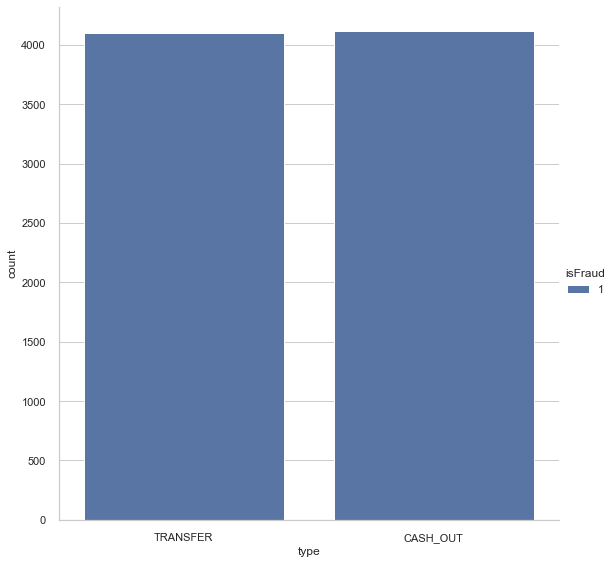

In [11]:
data = raw.filter(items = ["isFraud", "type"])
data = data.query('isFraud == 1')

sns.catplot(x = 'type', 
            hue = "isFraud", 
            kind = "count",            
            data = data, 
            height = 8, 
            aspect = 1            
            )

Curiously, a fraudulent transaction only occurs when the 'type' is TRANSFER or CASH_OUT

*This will be feature engineered further down this project*

### Amount Analysis

We can observe that there are some transactions where the 'amount' is zero. Curiously, all transactions with zero 'amount' are fraudulent.

In [12]:
raw['amount'].describe()

count    6362620.00
mean      179861.90
std       603858.23
min            0.00
25%        13389.57
50%        74871.94
75%       208721.48
max     92445516.64
Name: amount, dtype: float64

In [13]:
no_amount = raw.query("amount == 0")
no_amount_fraud = round(((no_amount['isFraud'].sum() / no_amount['isFraud'].count()) * 100), 2)

print("When the 'amount' is zero, {}% of the transactions are fraudulent.".format(no_amount_fraud))

When the 'amount' is zero, 100.0% of the transactions are fraudulent.


### Names Analysis

On the Data Overview section we observed that each transaction has a 'origin name' and a 'destination name'. Each name are composed of a letter (C or M) and a number.

In [14]:
names = pd.DataFrame(raw['nameOrig'].str[0])
names['one'] = 1
names.groupby(by = ['nameOrig']).sum()

,one
nameOrig,
C,6362620


In [15]:
names = pd.DataFrame(raw['nameDest'].str[0])
names['one'] = 1
names.groupby(by = ['nameDest']).sum()

,one
nameDest,
C,4211125
M,2151495


Analyzing the name distribution, all origin names are 'C', and destination names can be both C or M. </br>

Therefore, a transaction can be C to C or C to M.

*This will be feature engineered further down this project*

### 'isFlaggedFraud' Analysis

The 'isFlaggedFraud' variable is described by the official dataset dictionary as follows:

_"The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction"._

As we can observe below, there are only 16 transactions flagged as 'isFlaggedFraud', and all of them are also 'isFraud'.

*This variable don't represent significant value and will be discarded further down the project.*

In [16]:
is_ff = raw['isFlaggedFraud'].sum()
total = raw['isFlaggedFraud'].count()

perc = round(((is_ff / total) * 100), 5)

print("A total of {} out of {} rows are 'isFlaggedFraud', this represents {}% of the dataset.".format(is_ff, total, perc))

A total of 16 out of 6362620 rows are 'isFlaggedFraud', this represents 0.00025% of the dataset.


In [17]:
# Visualizing all 16 'isFlaggedFraud' transactions.
raw.query('isFlaggedFraud == 1')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.00,0.00,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.00,0.00,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.00,0.00,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.00,0.00,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.00,0.00,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.00,0.00,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.00,0.00,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.00,0.00,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.00,0.00,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.00,0.00,1,1


# Feature Engineering

Feature engineering (or feature extraction) is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

Source: https://en.wikipedia.org/wiki/Feature_engineering

In [18]:
# Creating a copy of the datatset:
dataset = raw.copy()

## Transforming Categorical Variables to Binary

### Feature Engineering the "type" variable

On the EDA, we discovered that a fraudulent transaction only occurs on TRANSFER or CASH_OUT types, therefore, we will make this a feature.

In [19]:
# Creating a function that returns 1 for 'TRANSFER':
def transfer_binary(value):
    if value == 'TRANSFER':
        return 1
    else:
        return 0

# Creating a function that returns 1 for 'CASH_OUT':
def cashout_binary(value):
    if value == 'CASH_OUT':
        return 1
    else:
        return 0

In [20]:
# Applying the function on the dataset:

# Using the 'map()' function do apply the function above to all values in the 'type' column:
dataset['transfer'] = dataset['type'].map(transfer_binary)

# Using the 'map()' function do apply the function above to all values in the 'type' column:
dataset['cashOut'] = dataset['type'].map(cashout_binary)

In [21]:
# Checking if the 2 new columns were correctly created:

dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transfer,cashOut
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0


### Feature Engineering the "nameOrig" and "nameDest" variables

As we observed in the EDA section, all "nameOrig" starts with "C", therefore, we don't need to feature engineer it, because it doesn't represent value for our prediction model.

On the other hand, the "nameDest" can be either 'C' or 'M'. We'll make this a feature.

In [22]:
# Creating a function that returns 1 if the value starts with 'TRANSFER':
def name_c_binary(value):
    if value.startswith('C'):
        return 1
    else:
        return 0

# Creating a function that returns 1 for 'CASH_OUT':
def name_m_binary(value):
    if value.startswith('M'):
        return 1
    else:
        return 0

In [23]:
# Applying the function on the dataset:

# Using the 'map()' function do apply the function above to all values in the 'type' column:
dataset['name_dest_C'] = dataset['nameDest'].map(name_c_binary)

# Using the 'map()' function do apply the function above to all values in the 'type' column:
dataset['name_dest_M'] = dataset['nameDest'].map(name_m_binary)

In [24]:
# Checking if the 2 new columns were correctly created:

dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transfer,cashOut,name_dest_C,name_dest_M
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1


### Adding the 'diff' variable

This 2 new features are created with the objective of registering the difference between old and new balances.

In [25]:
# Creating the new feature based on the error of the Origin account balance:
dataset['diffOrig'] = dataset['newbalanceOrig'] + dataset['amount'] - dataset['oldbalanceOrg']

# Creating the new feature based on the error of the Destination account balance:
dataset['diffDest'] = dataset['oldbalanceDest'] + dataset['amount'] - dataset['newbalanceDest']

In [26]:
# Checking if the 2 new columns were correctly created:

dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transfer,cashOut,name_dest_C,name_dest_M,diffOrig,diffDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0.00,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0.00,1864.28
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,0,1,0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,1,0,0.00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0.00,11668.14


## Removing Useless Variables

In this section we'll remove all useless columns

In [27]:
# Checking all the columns currently on the dataset:

pd.DataFrame(dataset.columns)

,0
0,step
1,type
2,amount
3,nameOrig
4,oldbalanceOrg
5,newbalanceOrig
6,nameDest
7,oldbalanceDest
8,newbalanceDest
9,isFraud


In [28]:
# Setting the column names that will be removed:
columns_to_remove = ["type", "nameOrig", "nameDest", "isFlaggedFraud"]

# Removing the useless columns from both datasets:
dataset.drop(columns = columns_to_remove, inplace = True)

# Checking the final set of columns
pd.DataFrame(dataset.columns)

,0
0,step
1,amount
2,oldbalanceOrg
3,newbalanceOrig
4,oldbalanceDest
5,newbalanceDest
6,isFraud
7,transfer
8,cashOut
9,name_dest_C


## The Final Dataset

In [29]:
# Reordering the columns
dataset = dataset[['step', 'transfer', 'cashOut', 'name_dest_C', 'name_dest_M', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'diffOrig', 'diffDest', 'isFraud']]

# Checking dataset:
dataset.head()

,step,transfer,cashOut,name_dest_C,name_dest_M,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,diffOrig,diffDest,isFraud
0,1,0,0,0,1,170136.00,160296.36,0.00,0.00,0.00,9839.64,0
1,1,0,0,0,1,21249.00,19384.72,0.00,0.00,0.00,1864.28,0
2,1,1,0,1,0,181.00,0.00,0.00,0.00,0.00,181.00,1
3,1,0,1,1,0,181.00,0.00,21182.00,0.00,0.00,21363.00,1
4,1,0,0,0,1,41554.00,29885.86,0.00,0.00,0.00,11668.14,0


In [30]:
# Checking dataset info:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   transfer        int64  
 2   cashOut         int64  
 3   name_dest_C     int64  
 4   name_dest_M     int64  
 5   oldbalanceOrg   float64
 6   newbalanceOrig  float64
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   diffOrig        float64
 10  diffDest        float64
 11  isFraud         int64  
dtypes: float64(6), int64(6)
memory usage: 582.5 MB


# Modeling

## Train / Test Split

In [31]:
# Setting the seed:
np.random.seed(10)

In [32]:
# Setting the 'X' dataset (without the target):
X = dataset.drop(columns = ['isFraud'])

# Setting the 'y' dataset (only the target):
y = dataset['isFraud']

# Splitting the data into train and test sets, with 80% for train and 20% for test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [33]:
print("The TRAIN dataset contains {}% of fraudulent transactions.".format(round((y_train.sum() / y_train.count() * 100), 5)))

print("The TEST dataset contains {}% of fraudulent transactions.".format(round((y_test.sum() / y_test.count() * 100), 5)))

The TRAIN dataset contains 0.12907% of fraudulent transactions.
The TEST dataset contains 0.12911% of fraudulent transactions.


In [34]:
# Adding the target to the train dataset:
train_df = X_train.copy()
train_df['isFraud'] = y_train

# Adding the target to the test dataset:
test_df = X_test.copy()
test_df['isFraud'] = y_test

In [35]:
# Checking the statistical summary of the train dataset:
train_df.describe()

,step,transfer,cashOut,name_dest_C,name_dest_M,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,diffOrig,diffDest,isFraud
count,5090096.00,5090096.00,5090096.00,5090096.00,5090096.00,5090096.00,5090096.00,5090096.00,5090096.00,5090096.00,5090096.00,5090096.00
mean,243.39,0.08,0.35,0.66,0.34,833571.84,854822.89,1099878.59,1224159.82,201004.25,55471.98,0.00
std,142.32,0.28,0.48,0.47,0.47,2887887.88,2923731.52,3386317.53,3662678.54,606420.85,444439.26,0.04
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-75885725.63,0.00
25%,156.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2957.71,0.00,0.00
50%,239.00,0.00,0.00,1.00,0.00,14198.00,0.00,132668.78,214577.46,68615.39,3495.68,0.00
75%,335.00,0.00,1.00,1.00,1.00,107207.00,144229.05,942643.70,1111772.68,249569.86,29335.94,0.00
max,743.00,1.00,1.00,1.00,1.00,59585040.37,49585040.37,356015889.35,356179278.92,92445516.64,13191233.98,1.00


In [36]:
# Checking the statistical summary of the test dataset:
test_df.describe()

,step,transfer,cashOut,name_dest_C,name_dest_M,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,diffOrig,diffDest,isFraud
count,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00
mean,243.44,0.08,0.35,0.66,0.34,835128.14,856276.79,1103993.98,1228342.73,201445.33,55947.93,0.00
std,142.39,0.28,0.48,0.47,0.47,2889662.20,2925316.93,3450150.34,3719577.63,607568.13,429689.67,0.04
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-62830311.85,0.00
25%,156.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2942.86,0.00,0.00
50%,239.00,0.00,0.00,1.00,0.00,14248.00,0.00,132809.76,215083.63,68934.12,3518.17,0.00
75%,335.00,0.00,1.00,1.00,1.00,107750.00,144380.30,944554.06,1112392.28,249896.96,29421.58,0.00
max,743.00,1.00,1.00,1.00,1.00,44892193.09,43686616.33,355380483.53,356015889.35,69337316.27,10000000.00,1.00


## Modeling (PyCaret)

In this project, we'll use PyCaret for the modeling.

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

More about PyCaret on: https://pycaret.gitbook.io/docs/

I strongly suggest that you consult the official PyCaret Classification docs here: https://pycaret.readthedocs.io/en/latest/api/classification.html#

### Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

We'll use the **'train_df'** to train the model, passing the **'isFraud'** as the target. We also don't want it to remove perfect collinearity and split shuffle the data.

Effectively, after the setup stage, our sets will look like this:

* Train Set (3563067 rows) = Splitted from **'train_df'**
* Validation Set (1527029 rows) = Splitted from **'train_df'**
* Test Set (1272524 rows) = Full '**test_df**'

In [37]:
s = setup(train_df, 
          target = 'isFraud',          
          remove_perfect_collinearity = False,
          data_split_shuffle = False)

,Description,Value
0,session_id,419
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5090096, 12)"
5,Missing Values,0
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,0
9,High Cardinality Features,0


### Compare Models

This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

On this comparing stage, we won't be using cross validation, for better performance. However, in real life projects you might consider using it.

In [38]:
compare = compare_models(cross_validation = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.9987,0.9975,0.9960,0.9967,0.9967,0.9967,45.7200
rf,Random Forest Classifier,1.0000,0.9990,0.9975,1.0000,0.9987,0.9987,0.9987,222.8700
xgboost,Extreme Gradient Boosting,1.0000,0.9999,0.9975,0.9995,0.9985,0.9985,0.9985,297.2500
ada,Ada Boost Classifier,0.9999,0.9997,0.9539,0.9921,0.9726,0.9726,0.9728,402.4100
et,Extra Trees Classifier,0.9998,0.9989,0.8213,0.9988,0.9014,0.9012,0.9056,128.1900
knn,K Neighbors Classifier,0.9994,0.9213,0.6770,0.8659,0.7599,0.7596,0.7654,2349.7300
lda,Linear Discriminant Analysis,0.9991,0.9443,0.3954,0.8002,0.5293,0.5289,0.5622,9.9000
ridge,Ridge Classifier,0.9989,0.5565,0.1129,1.0000,0.2029,0.2027,0.3358,3.6300
lightgbm,Light Gradient Boosting Machine,0.9988,0.5972,0.4795,0.5411,0.5085,0.5079,0.5088,20.6400
dummy,Dummy Classifier,0.9987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2000


### Creating the Model

This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

On the comparison above, both the **Decision Tree** and the **Random Forest** classifiers delivered excellent metrics, however, the **Decision Tree** trained much faster. In a real life scenario, less computational cost = less cloud expenditures.

Having this in mind, we'll choose the **Decision Tree** classifier, and this time we'll enable the cross validation for training.

In [39]:
model = create_model('dt',
                     cross_validation = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.9967,0.9935,0.9956,0.9945,0.9945,0.9945
2,1.0000,0.9967,0.9935,0.9913,0.9924,0.9924,0.9924
3,1.0000,0.9989,0.9978,0.9914,0.9946,0.9946,0.9946
4,1.0000,0.9946,0.9891,0.9956,0.9924,0.9924,0.9924
5,1.0000,0.9989,0.9978,0.9957,0.9967,0.9967,0.9967
6,1.0000,0.9967,0.9935,0.9978,0.9956,0.9956,0.9956
7,1.0000,0.9989,0.9978,1.0000,0.9989,0.9989,0.9989
8,1.0000,0.9967,0.9935,0.9978,0.9956,0.9956,0.9956


### Model Tuning

This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

As observed on the previous step, our model already presents excellent results. In a real project we could tune the hyperparameters to improve its performance.

In [40]:
# tuned_model = tune_model(model,                        
#                          optimize = 'AUC',
#                          search_library = 'scikit-learn',
#                          search_algorithm = 'random',
#                          choose_better = True)

### Evaluate Model

This function displays a user interface for analyzing performance of a trained model. It calls the plot_model function internally.

In a real project, this function would be great, for its interactivity. But, for this project we'll use the 'plot_model' function to plot each performance analysis individually.

In [41]:
# evaluate_model(tuned_model)

### Plot Model

This function analyzes the performance of a trained model on holdout set. It may require re-training the model in certain cases.

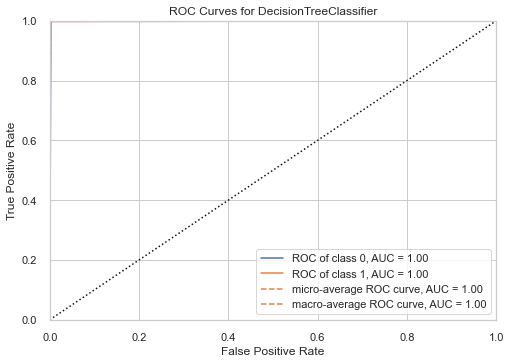

In [42]:
# The trained model is very precise, the ROC Curve is virtually invisible, right on top of the axis.

plot_model(model, plot = 'auc')

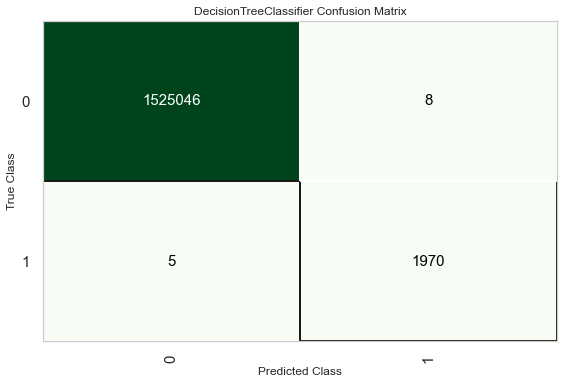

In [43]:
# On this confusion matrix, we can observe that the false positive and false negatives are very few:

plot_model(model, plot = 'confusion_matrix')

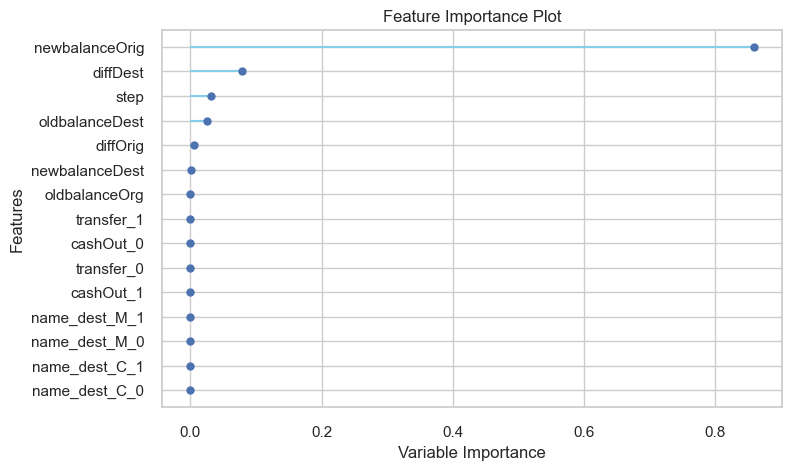

In [44]:
# Note how the some variables are important for predicting if a trasaction were fraudulent or not ('newbalanceOrig, 'diffDest', 'step', 'oldbalanceDest', 'diffOrig')
# The 'name_dest' variables are pretty much irrelevant to the model.

plot_model(model, plot = 'feature_all')

### Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (SHapley Additive exPlanations). 

For more info on this, please see: https://shap.readthedocs.io/en/latest/

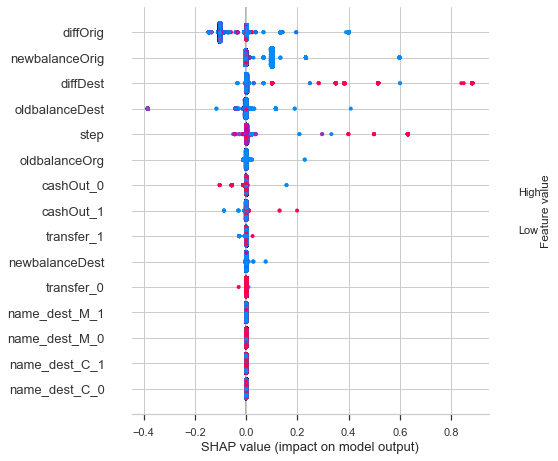

In [45]:
# Analyzing the SHAP value of each feature we can observe a similar result of the previous Feature Importance analysis. 

interpret_model(model,
                plot = 'summary')

### Prediction

This function predicts Label and Score (probability of predicted class) using a trained model. When data is None, it predicts label and score on the holdout set.

In [46]:
# Prediction of the label on the 'test_df' with data that the model has never seen before.

pred = predict_model(model, data = test_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,0.9976,0.9951,0.9927,0.9939,0.9939,0.9939


In [47]:
print("Out of {} transactions on the 'test_df' dataset, the model failed to predict {} of them.".format(test_df.shape[0], pred.query('isFraud != Label').shape[0]))

Out of 1272524 transactions on the 'test_df' dataset, the model failed to predict 20 of them.


In [48]:
# Checking the transactions that the model failed to predict:

pred.query('isFraud != Label')

,step,transfer,cashOut,name_dest_C,name_dest_M,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,diffOrig,diffDest,isFraud,Label,Score
33027,8,0,1,1,0,0.00,0.00,21678.00,279011.81,257333.81,0.00,0,1,1.00
359833,17,0,1,1,0,0.00,0.00,39869.00,288128.40,226100.62,-22158.78,0,1,1.00
25875,8,1,0,1,0,0.00,0.00,0.00,970749.68,1078013.76,107264.08,1,0,1.00
694551,36,0,1,1,0,0.00,0.00,34937.86,269315.15,234377.29,0.00,1,0,1.00
6281484,646,1,0,1,0,10399045.08,10399045.08,0.00,0.00,399045.08,399045.08,1,0,1.00
2058343,181,0,1,1,0,0.00,0.00,613712.35,946441.90,332729.54,-0.01,1,0,1.00
681223,36,0,1,1,0,3579.00,0.00,87657.61,114528.01,23291.40,0.00,0,1,1.00
2987849,231,0,1,1,0,0.00,0.00,323212.74,417350.71,94137.98,0.01,0,1,1.00
2953807,230,1,0,1,0,5517.00,0.00,0.00,359622.88,2648135.24,2294029.36,0,1,1.00
43191,9,0,1,1,0,0.00,0.00,40372.29,270653.99,230281.70,0.00,0,1,1.00


## Final Thoughts

On this project we covered exploratory data analysis, feature engineering and predictive modeling using PyCaret, an open-source, low-code machine learning library. 

Its important to note that we merely scratched the surface of PyCaret. This lib has endless possibilities for custom tuning, saving, logging, deploying to various clouds and so much more.Therefore, I strongly suggest that you read the official PyCaret doc.

I intend to dive deeper in PyCaret in future projects. So stay tuned on my GitHub! :)